# Forced Vibrations with Viscous Damping

So far we have learned about free vibrations of single degree of freedom linear systems. In this lesson, we will explore how these systems behave when external forces are applied to the same systems. Forced vibrations occur in many real systems. For example, any engine that generates rotational motions impose periodic forces. An unblanced washing machine is an example that many of us have likely experienced.

## Goals

- Write the equations of motion of the system.
- Derive the particular solution for the non-homogeneous system.
- Investigate the steady state solution.

## Prerequisites

- Vector method of representing vibrations
- Free undamped vibrations
- Free damped vibrations

## Interactive Notes

### Static version of the notes: http://tinyurl.com/vib-notes

1. Download this notebook by clicking this link: http://tinyurl.com/vib-notes-dl (you may need to select "File > Save As" after it opens).
2. Navigate to http://tmpnb.org, upload the notebook, and then select it to open it.
3. Execute the entire notebook by selecting "Cell > Run All" from the menu.
4. Be sure to save and download the notebook from tmpnb.org before closing the browser window if you want to save your modifications.

# The System

![Alt text](mass_spring_damper.svg)

We are going to extend the homogenous mass spring damper system by adding an applied sinusoidal force. The quantities of interest are:

- $x,\dot{x},\ddot{x}$: position, velocity, and acceleration
- $m$: mass
- $c$: viscous damping coefficient
- $k$: spring constant
- $F_0$: amplitude of the applied force
- $\omega$: frequency of the applied force

# Equations of Motion

We first write down Newton's Second Law for this system by examining the free body diagram:

$$\sum F_x = m \ddot{x} = -c \dot{x} -kx + F_0 \operatorname{sin}\omega t$$

which provides the second order differential equation in canonical form:

$$m\ddot{x} + c\dot{x} + kx = F_0 \operatorname{sin}\omega t$$

We have defined these variables in previous lessons:

- $\omega_n = \sqrt{\frac{k}{m}}$: undamped natural frequency
- $c_c= 2m\omega_n$: critical frequency
- $\zeta = \frac{c}{c_c}$: damping ratio
- $w_d = w_n \sqrt{1 - \zeta^2}$: damped natural frequency

The equation of motion can also be written in terms of these ratios by dividing through by the mass:

$$\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = \frac{F_0}{m} \operatorname{sin}\omega t$$

# Solution to the differential equation

The equation of motion is a second order non-homogenous ordinary differential equation. Recall that the solution to a non-homogenous ordinary differential equation is simply the sum of the homogenous solution and a particular solution due to superposition of linear systems.

$$x = x_h + x_p$$

# Homogenous Solution

We know from the previous lessons that the solution to the homogenous system

$$\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0$$

is

$$x_h = e^{-\omega_n \zeta t}[A \operatorname{sin}\omega_d t + B \operatorname{cos}\omega_d t]$$

where $A$ and $B$ are determined by the initial conditions. Depending on the value of $\zeta$ the solution will described by three qualitively different motions: over-damped $(\zeta > 1)$, critically damped $(\zeta = 1)$, or under-damped $(\zeta < 1)$ motion.

## Review Question

A damping ratio greater than 1 implies:

1. That the there will be sinusoidal vibrations that decrease over time.
2. That there will be sinusoidal vibrations that increase over time.
3. The exponential time constant is large and positive.
4. There are no sinusoidal vibrations.

# Steady State Solution

The prescribed sinusoidal force causes the steady state solution to converge to some motion that is the same frequency as our imposed forcing function, instead of the natural frequency of the system.

Because both the first and second derivatives of $x$ are in the equations of motion and the forcing function is a sinusoid we can deduce that a possible candidate particular solution would be a sum of sines and cosines at the forced frequency:

$$x_p = C \operatorname{sin}\omega t + D \operatorname{cos}\omega t$$

By twice differentating $x_p$ and substituting it into the equation of motion one can use the method of undetermined coefficients to find $C$ and $D$. It is important to note that $C$ and $D$ do not depend on the initial conditions, as one would expect from a steady state solution that has no "memory" of the initial state.

# Different view of the steady state solution

The above solution is a valid solution but it isn't necessarily easily interpretable. We will use the graphical vector method to find $x_p$ in terms of two more interesting quantities. First, we can assume that

$$x_p = x_0 \operatorname{sin}(\omega t - \phi),$$

i.e. a displacment of an unknown magnitude with a phase difference with respect to the applied force. This is equivalent to the sum of sines and cosines above which can be shown using trigonometric identities.

From a previous lesson, we learned that periodic motions can be described by rotating vectors. We can find expressions for $x_0$ and $\phi$ by finding the sum of the vectors that describe the four forces in the equation of motion.

First the displacement $x_0$ is depicted as an unknown vector in the vertical direction. The force due the spring opposes the displacement and is drawn as a vector in the opposite direction with magnitude $kx_0$. The force due to the damper is $90^\circ$ to the spring force with a magnitude of $\omega c x_0$. The force due to the mass is $90^\circ$ from the damper force and has a magnitude of $\omega^2 m x_0$. Finally, the external force lags the displacement by a phase of $\varphi$.

![Alt text](vector-diagram.svg)

The sum of these forces equate must equate given Newton's second law. If we sum the horizontal and vertical directions we get:

$$c \omega x_0 - F_0 \operatorname{sin}\phi  = 0$$
$$F_0 \operatorname{cos}\phi + m \omega^2 x_0 - k x_0 = 0$$

These two equations can be used to solve for $x_0$ and $\phi$. First, by squaring both equations and adding them we get:

$$x_0 = \frac{F_0}{\sqrt{(c\omega)^2 + (k - m\omega^2)^2}}
      = \frac{F_0/k}{\sqrt{\left(2 \zeta \frac{\omega}{\omega_n}\right)^2 +
        \left(1 - \frac{\omega^2}{\omega_n^2}\right)^2}}$$

And by solving for sin and cos and dividing the equations:

$$\operatorname{tan}(\phi) = \frac{c\omega}{k - m\omega^2}
                           = \frac{2 \zeta \frac{\omega}{\omega_n}}{1 - \frac{\omega^2}{\omega_n^2}}$$

It is important to note that the steady state solution does not depend on the intial conditions like the homogenous solution does. $x_0$ and $\phi$ have nothing to do with the initial conditions.

These two equations are very important equations in vibrations and provide a great deal of insight. They tell us the amplitude and phase of the steady state displacement of the mass given the amplitude and frequency of the driving force.

At this point we can introduce the frequency ratio as it shows up in the equations a number of times:

$$r=\frac{\omega}{\omega_n}$$


## Exercise

1. If the driven $\omega$ is very small, e.g. it takes a hundred years to displace the mass to its maximum amplitude, what do you expect the amplitude and phase of the resulting steady state displacement to be? 
2. What do you think will happen if you drive the system at its natural frequency? (i.e. $\omega \rightarrow \omega_n$)
3. What happens to the amplitude and phase of the system when the frequency is very high? ($\omega \rightarrow \infty$)

# Graphical Exploration

Plotting the displacement amplitude and phase as a function of the frequency help give a better picture of what is going on. We'll use some code to explore an interactive plot. You can execute each cell by selecting it with the mouse or arrow keys and pressing "`<shift>+<enter>`" or selecting from the menu bar "Cell>Run".

This first cell simply loads some modules and functions that we will need. (Ignore the `FutureWarning`.)

In [1]:
from numpy import sqrt, sin, arctan2, linspace, rad2deg
from matplotlib.pyplot import subplots, tight_layout
from IPython.html.widgets import interact
from IPython.display import display
from IPython.core.pylabtools import figsize

:0: FutureWarning: IPython widgets are experimental and may change in the future.


The following sets the figures to display in the notebook (instead of a seperate window) and sets the figure size to 8 by 6 inches.

In [2]:
%matplotlib inline
figsize(8, 6)

We will set $F_0$ and $k$ equal to zero for convenience.

In [3]:
F_0 = 1.0
k = 1.0

The following cell defines several functions that compute the quantities of interest.

In [4]:
def F(t, w):
    """Computes the applied force given the time, amplitude,
    and frequency in radians."""
    return F_0 * sin(w * t)

def x_0(r, z):
    """Computes the displacment amplitude given the frequency ratio
    and the damping ratio."""
    return F_0 / k / sqrt((2 * z * r)**2 + (1 - r**2)**2)
    
def p(r, z):
    """Computes the phase angle given the frequency ratio and the
    damping ratio."""
    # Note that arctan2 is needed for arctan to return the value
    # from the correct quadrant.
    return arctan2(2.0 * z * r, 1 - r)

def x_p(t, x_0, w, p):
    """Computes the steady state solution give the time, displacement 
    amplitude, frequency in radians, and the phase."""
    return x_0 * sin(w * t - p)

We are going to plot the frequency response using the frequency ratio as the dependent variable and the trajectories using time as the dependent variable.

In [5]:
r = linspace(0.0, 3.0, num=1000) # list of frequency ratios
t = linspace(0.0, 50.0, num=1000) # list of time values

The following function plots four plots. The two on the left are the amplitude and phase diagrams of the frequency response and the two on the right show the input force trajectory and the output displacement trajectory.

In [6]:
def plot(z=1.0, r_i=1.0):
    """Plots the frequency response and trajectories given a value
    for the damping ratio and a specific freqency ratio."""
    
    fig, axes = subplots(2, 2)
    
    # The upper left axes shows the scaled displacement amplitude
    # as a function of frequency ratio.
    axes[0, 0].plot(r, x_0(r, z) / F_0 / k)
    axes[0, 0].set_xlim((r[0], r[-1]))
    axes[0, 0].set_ylim((0.0, 5.0))
    axes[0, 0].set_xlabel('$r = \omega / \omega_n$', fontsize=20)
    axes[0, 0].set_ylabel(r'$\frac{x_0}{F_0 /\ k}$', fontsize=20)
    # This plots a vertical line at the chosen frequency.
    axes[0, 0].axvline(r_i, linestyle='--', color='black')
    
    
    # The lower left axes shows the phase angle as a function of
    # the frequency ratio.
    axes[1, 0].plot(r, rad2deg(p(r, z)))
    axes[1, 0].set_ylim((-10.0, 190.0))
    axes[1, 0].set_xlabel('$r = \omega / \omega_n$', fontsize=20)
    axes[1, 0].set_ylabel('$\phi$', fontsize=20)
    # This plots a vertical line at the chosen frequency.
    axes[1, 0].axvline(r_i, linestyle='--', color='black')
    
    # The upper right plot shows the trajectory of the applied force.
    axes[0, 1].plot(t, F(t, r_i))
    axes[0, 1].set_ylim((-5.0, 5.0))
    axes[0, 1].set_xlabel('$t$', fontsize=20)
    axes[0, 1].set_ylabel('$F$', fontsize=20)
    
    # The lower right plot shows the trajectory of the displacment.
    axes[1, 1].plot(t, x_p(t, x_0(r_i, z), r_i, p(r_i, z)))
    axes[1, 1].set_ylim((-5.0, 5.0))
    axes[1, 1].set_xlabel('$t$', fontsize=20)
    axes[1, 1].set_ylabel('$x_p$', fontsize=20)
    
    tight_layout()

If the plot function is called with values for the damping and specific frequency ratio, then the four plots are generated and displayed.

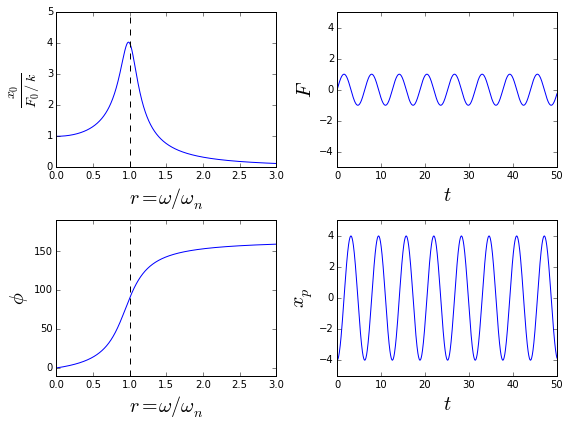

In [7]:
plot(z=0.125, r_i=1.0)

You can make the plot interactive by providing a range of values to the function inputs using the `interact` function. This gives two sliders. The first allows you to change the damping ratio to see how if affects the frequency response. The second lets you investigate a specific frequency ratio and the plots on the right show what the steady state solution looks like compared to the input force.

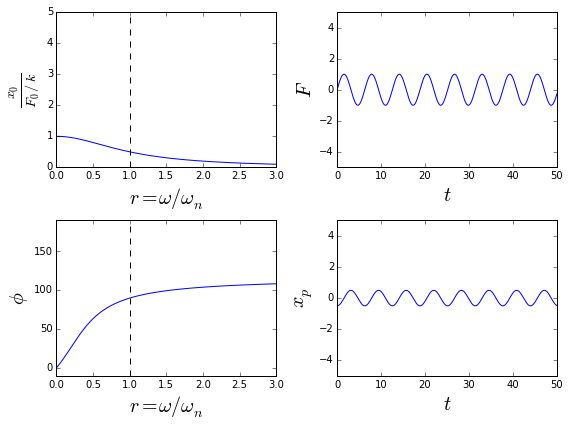

In [8]:
f = interact(plot, z=(0.0, 2.0, 0.01), r_i=(0.0, 3.0, 0.1))

# Homework

1. Derive the analytic equation for the frequency at which the maximum occurs. This frequency is called the resonant frequency. [Hint: You can find maxima of a function by taking its derivative.] 
2. Create a function that computes the maximum amplitude and frequency and use it to add a vertical line to the above plots.
3. Plot the time history of $x = x_h + x_p$.